In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('../kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../kaggle/input\kaggle_survey_2020_responses.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

plt.style.use("seaborn-whitegrid")

In [3]:
raw = pd.read_csv(r"../kaggle/input/kaggle_survey_2020_responses.csv", low_memory=False)
raw.shape

(20037, 355)

In [4]:
raw.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
question = raw.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [6]:
answer = raw.drop([0])
answer

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [7]:
answer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20036 entries, 1 to 20036
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: object(355)
memory usage: 54.4+ MB


# Q1 What is your age (# years)?

In [8]:
question["Q1"]

'What is your age (# years)?'

Text(0.5, 1.0, 'What is your age (# years)?')

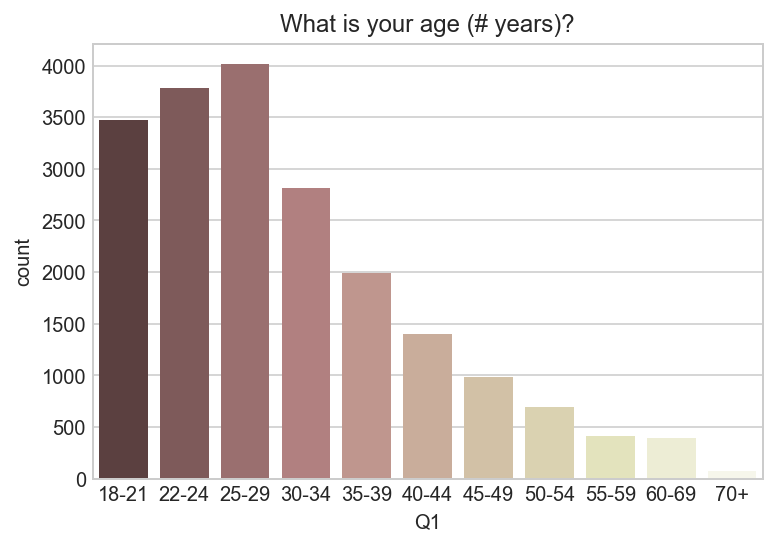

In [13]:
Q1 = answer['Q1'].value_counts().sort_index()
sns.countplot(data=answer.sort_values("Q1"), x="Q1", 
              palette="pink").set_title(question["Q1"])

# Q2 What is your gender? - Selected Choice

In [14]:
question_no = "Q2"
Q2 = answer[question_no].value_counts()
Q2

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

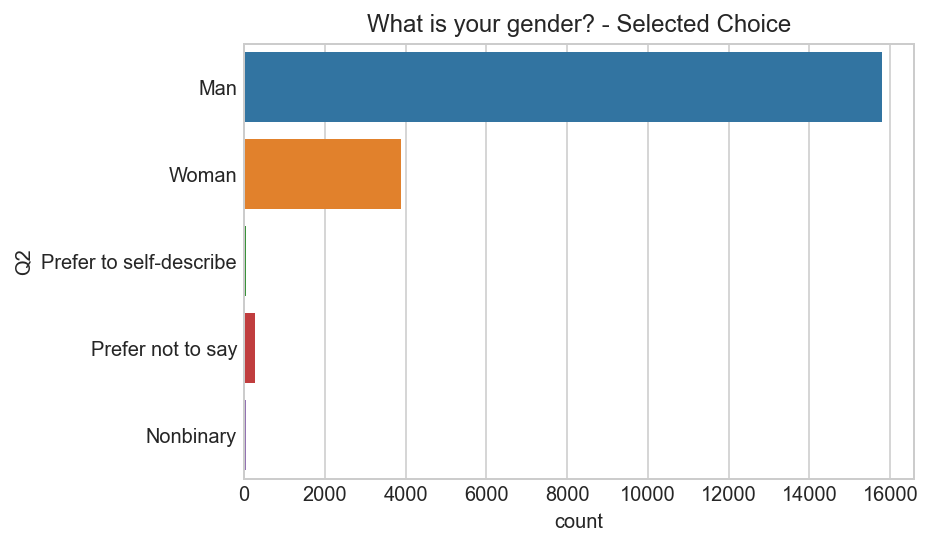

In [15]:
sns.countplot(data=answer, 
              y=question_no).set_title(question[question_no])

<AxesSubplot:xlabel='Q1'>

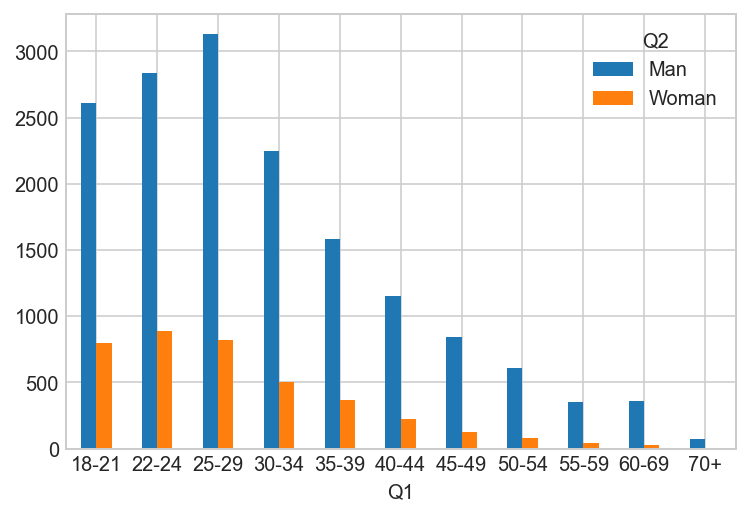

In [16]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man", "Woman"]].plot.bar(rot=0)

<AxesSubplot:title={'center':'Age & Gender'}, ylabel='Q1'>

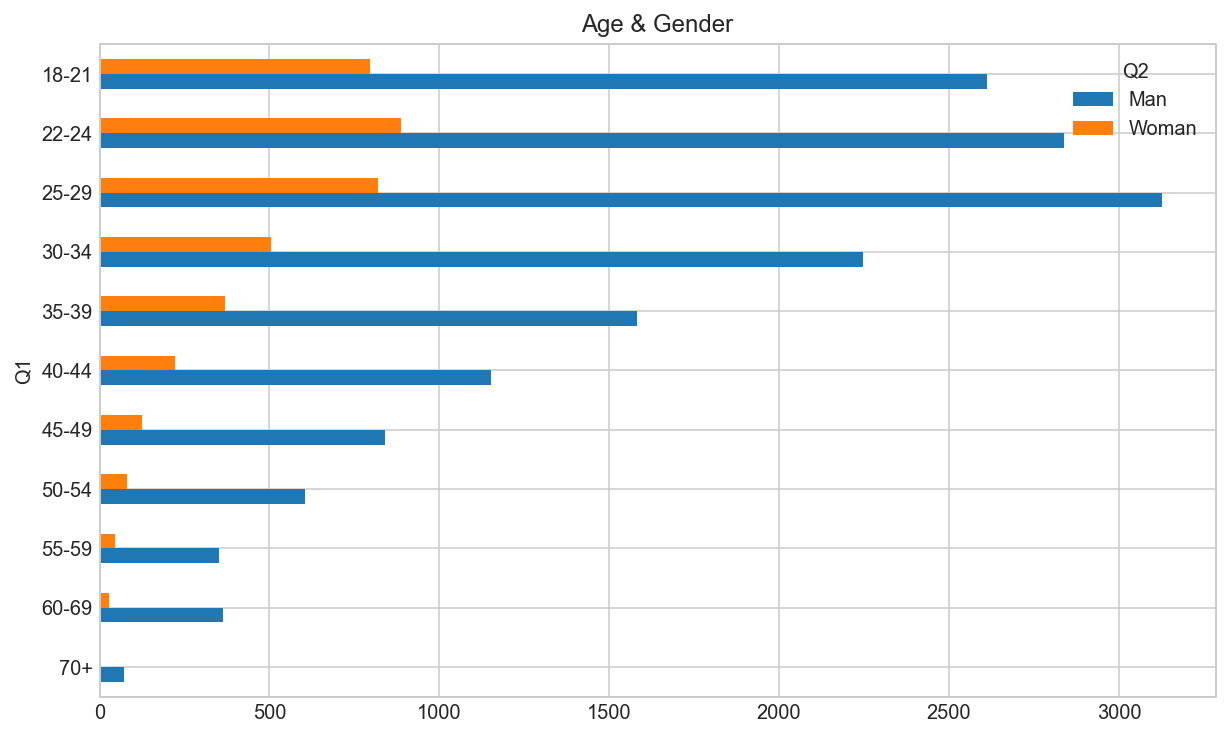

In [17]:
q1q2[["Man", "Woman"]].sort_index(ascending=False).plot.barh(figsize=(10, 6), title="Age & Gender")

Text(0.5, 1.0, 'Age & Gender')

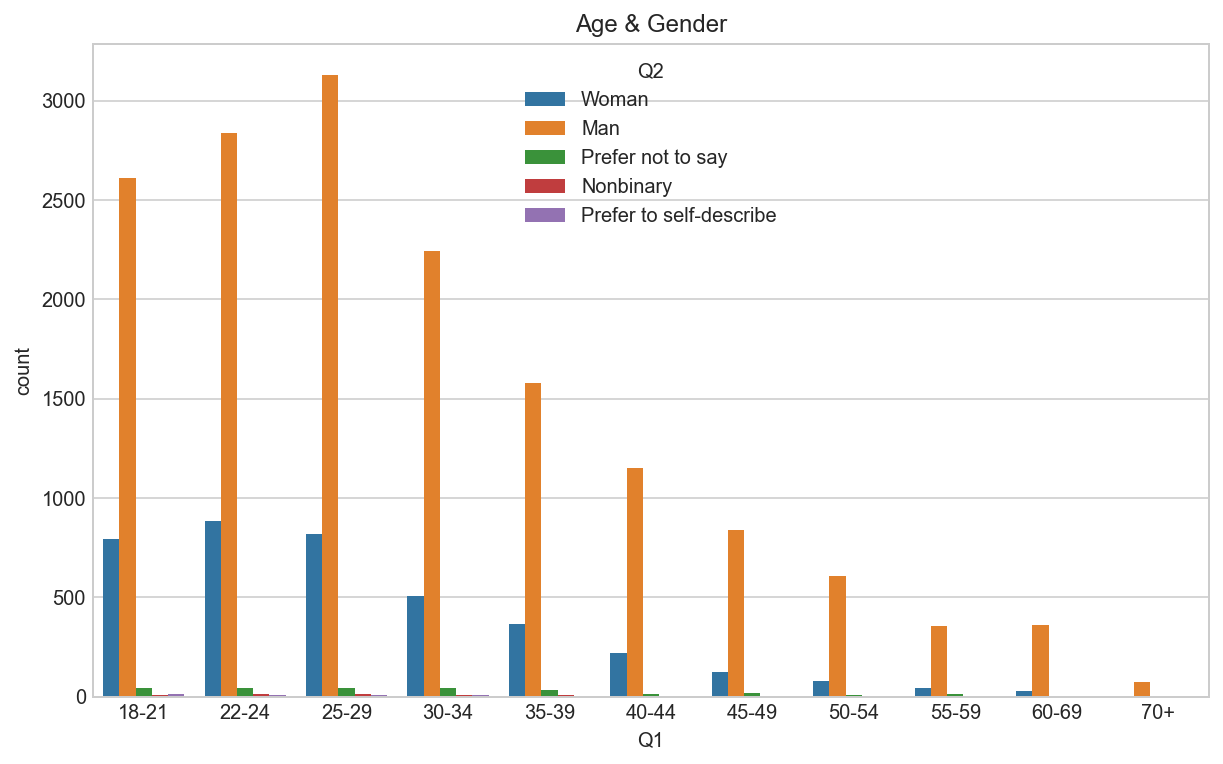

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=answer.sort_values("Q1"), x="Q1", hue="Q2").set_title("Age & Gender")

# Q3 In which country do you currently reside?

In [19]:
def show_countplot_by_qno(qno, fsize=(10, 6), order=None):
    """
    qno : question_no, ex) Q12
    fsize : figsize default (10, 6)
    order : optional order list, default value_counts().index
    """
    if not order :
        order = answer[qno].value_counts().index
        
    plt.figure(figsize=fsize)
    sns.countplot(data=answer, 
                  y=qno,
                  order=order,
                  palette="Blues_r"
                 ).set_title(question[qno])

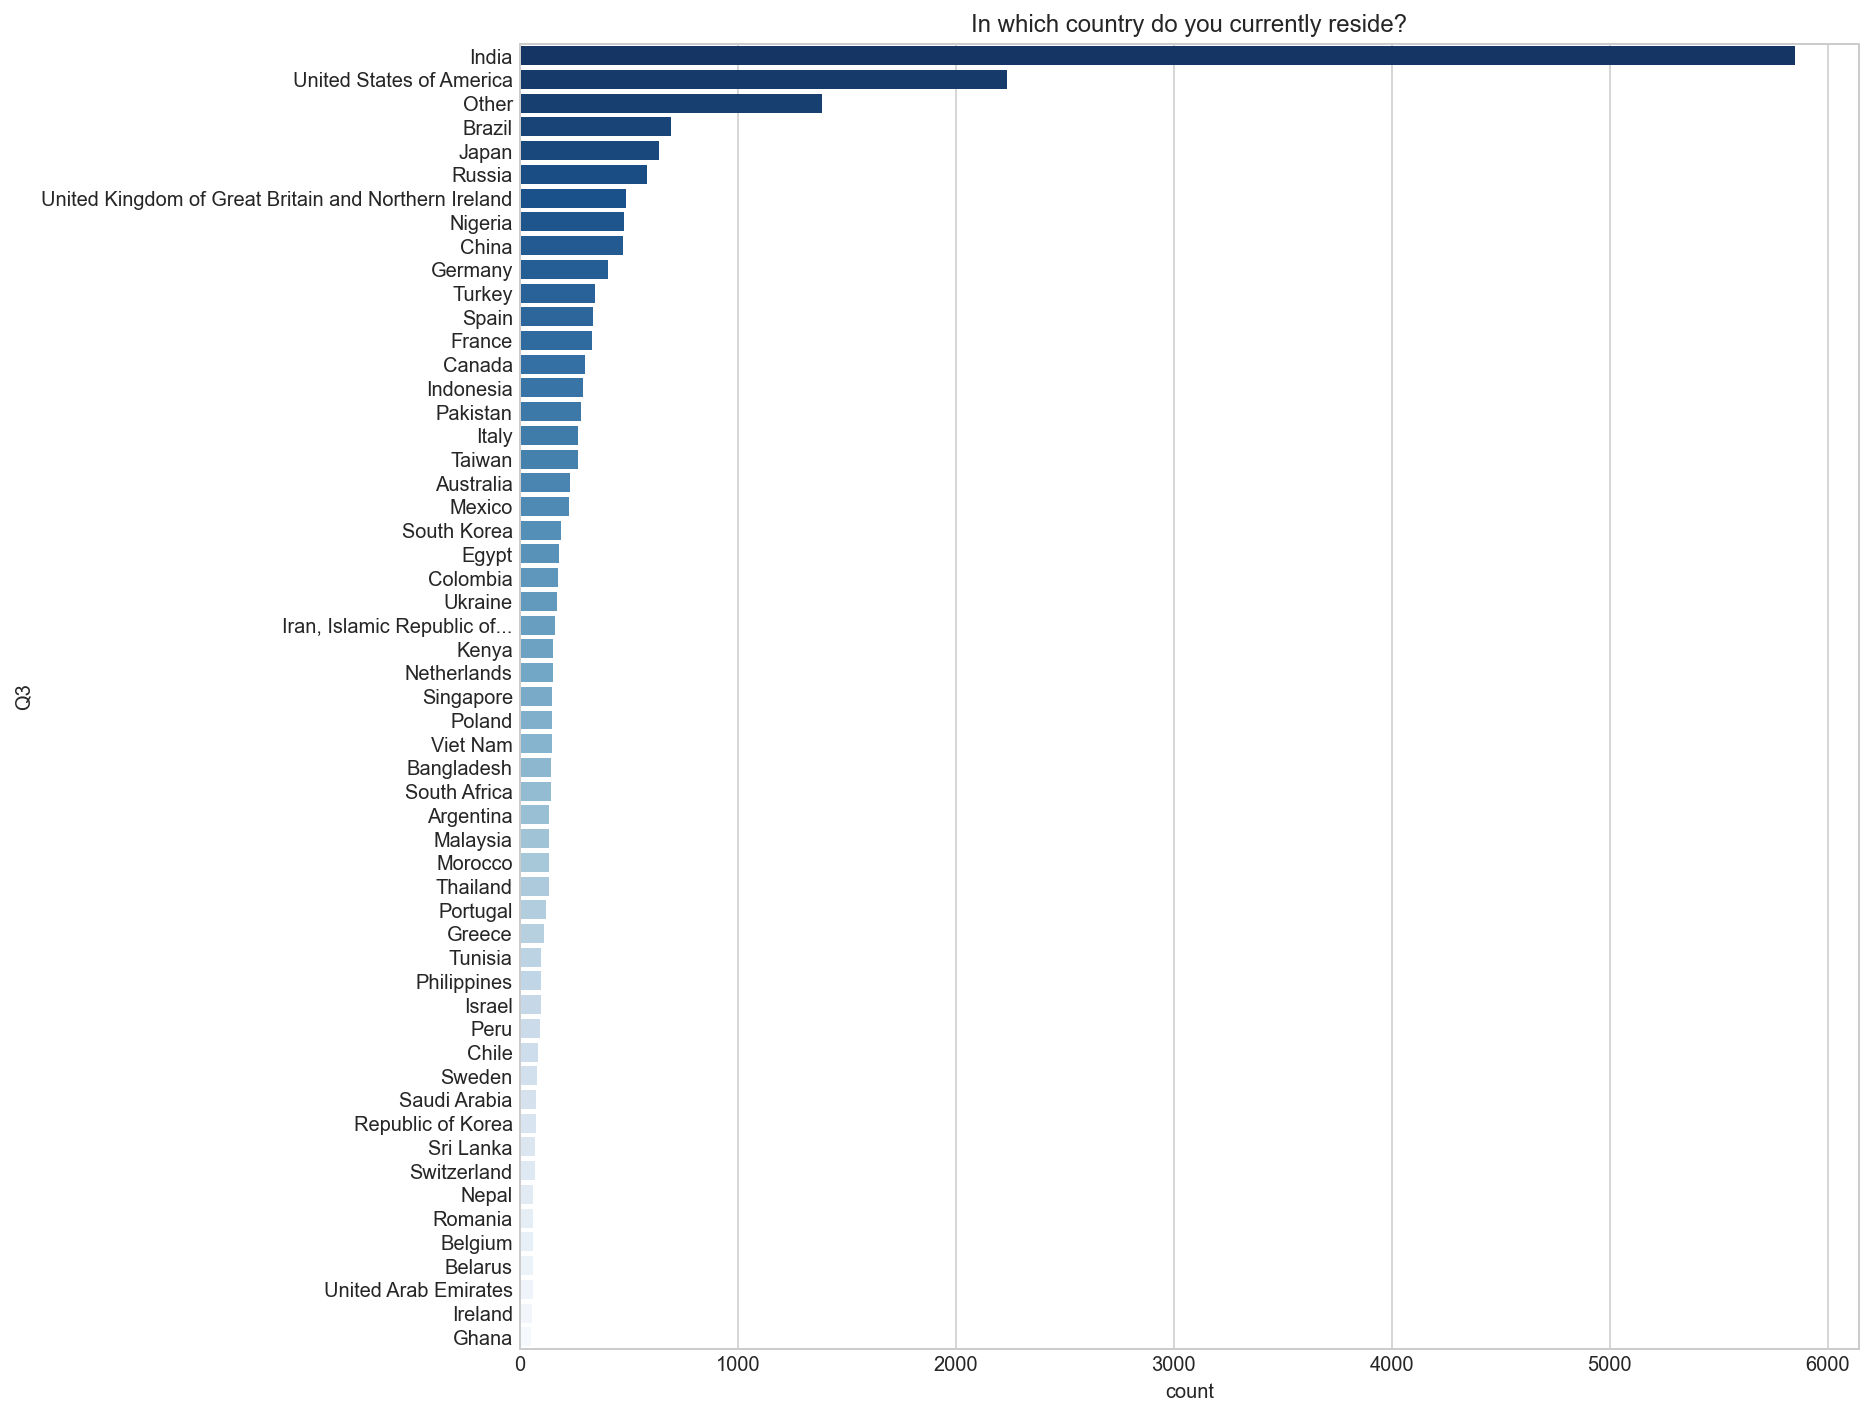

In [20]:
show_countplot_by_qno("Q3", fsize=(12, 12))

# Q4 🎓 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

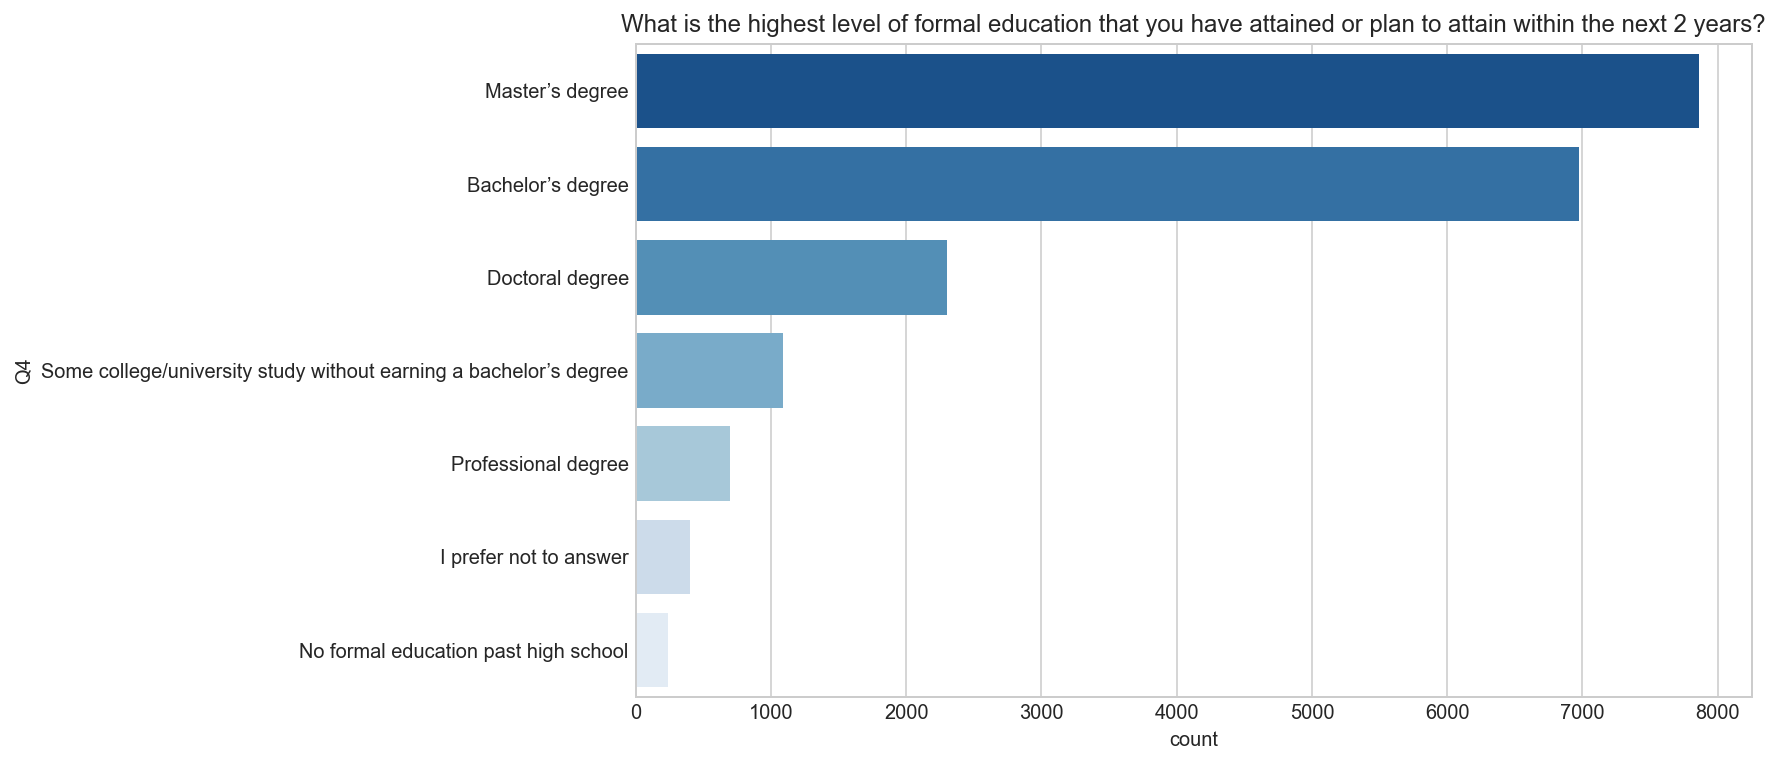

In [21]:
show_countplot_by_qno("Q4")

# Q5 Select the title most similar to your current role (or most recent title if retired):

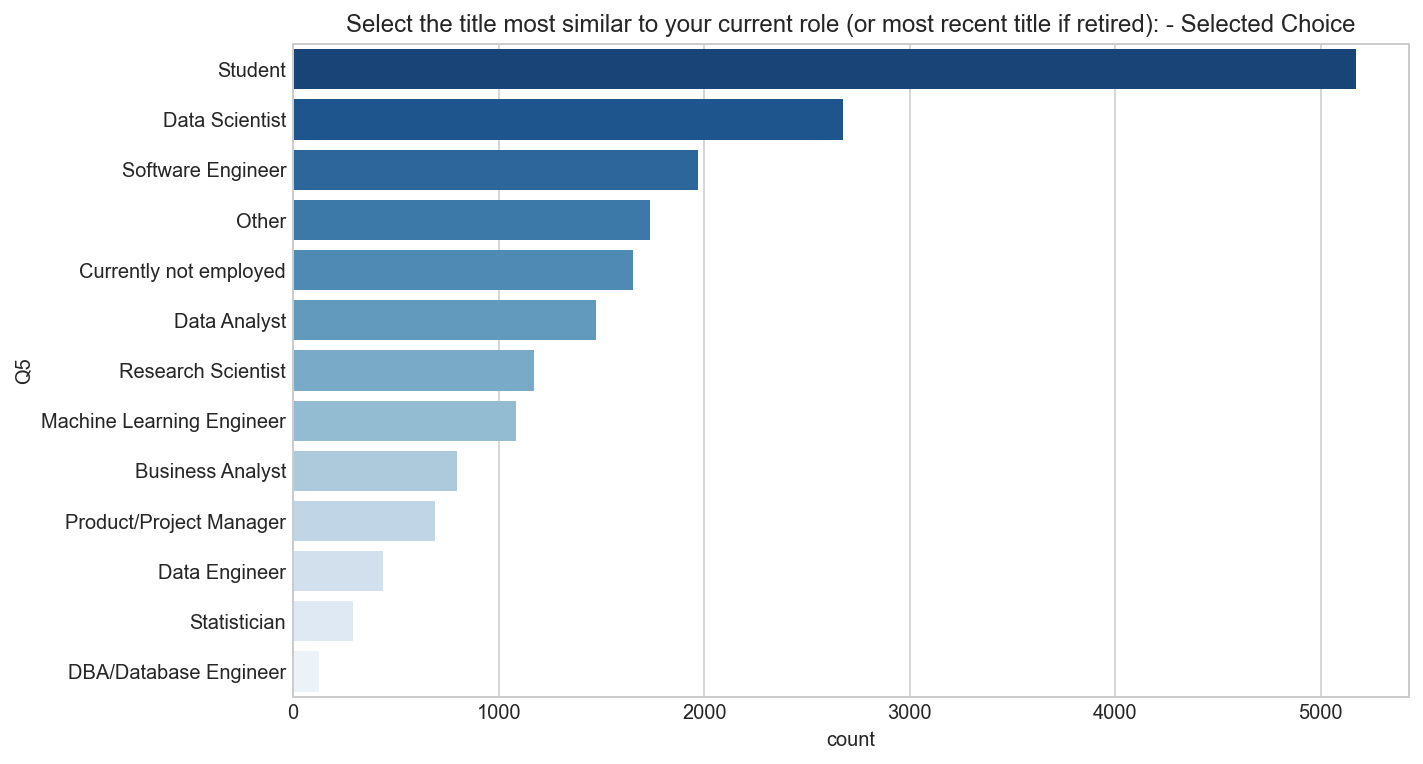

In [22]:
show_countplot_by_qno("Q5")

# Q6 For how many years have you been writing code and/or programming?

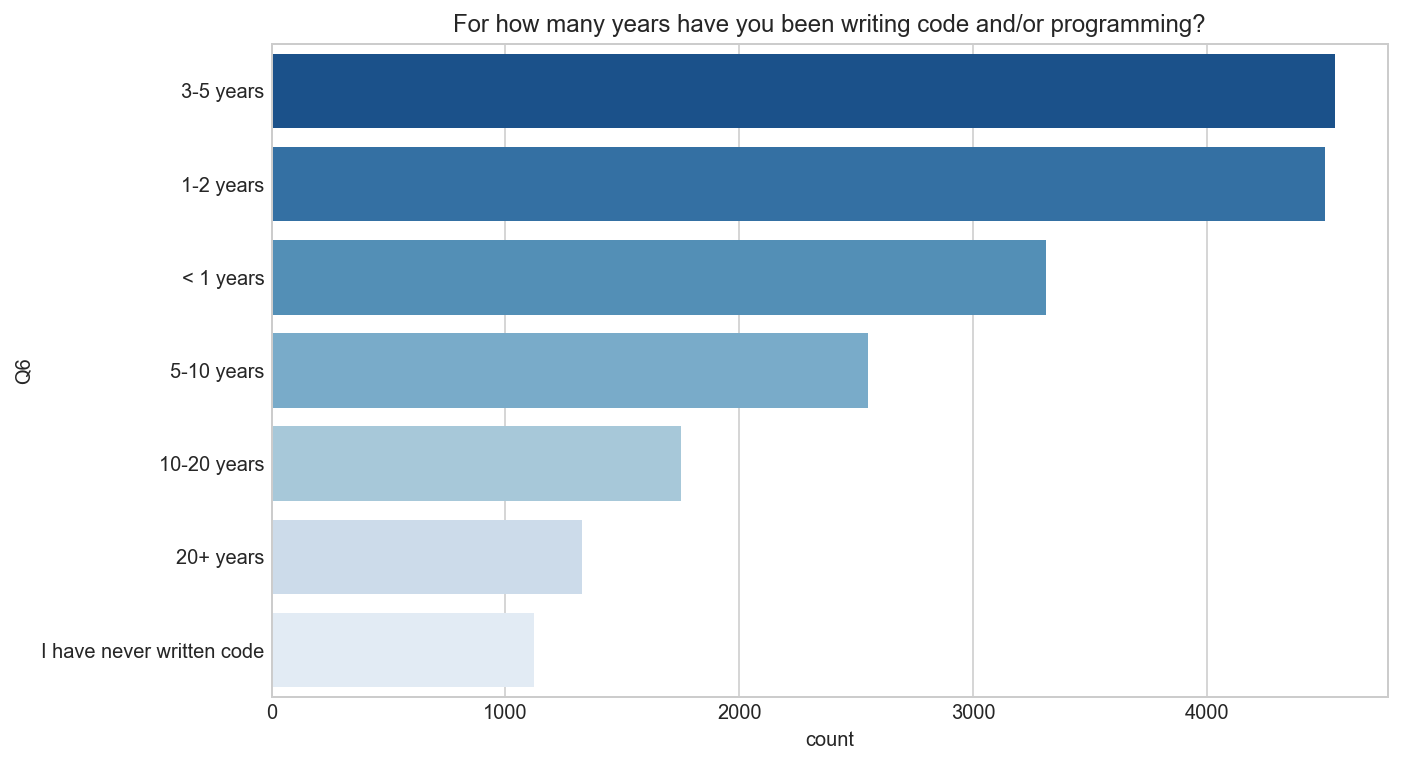

In [23]:
show_countplot_by_qno("Q6")

In [24]:
q6_cols = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years','10-20 years', '20+ years']

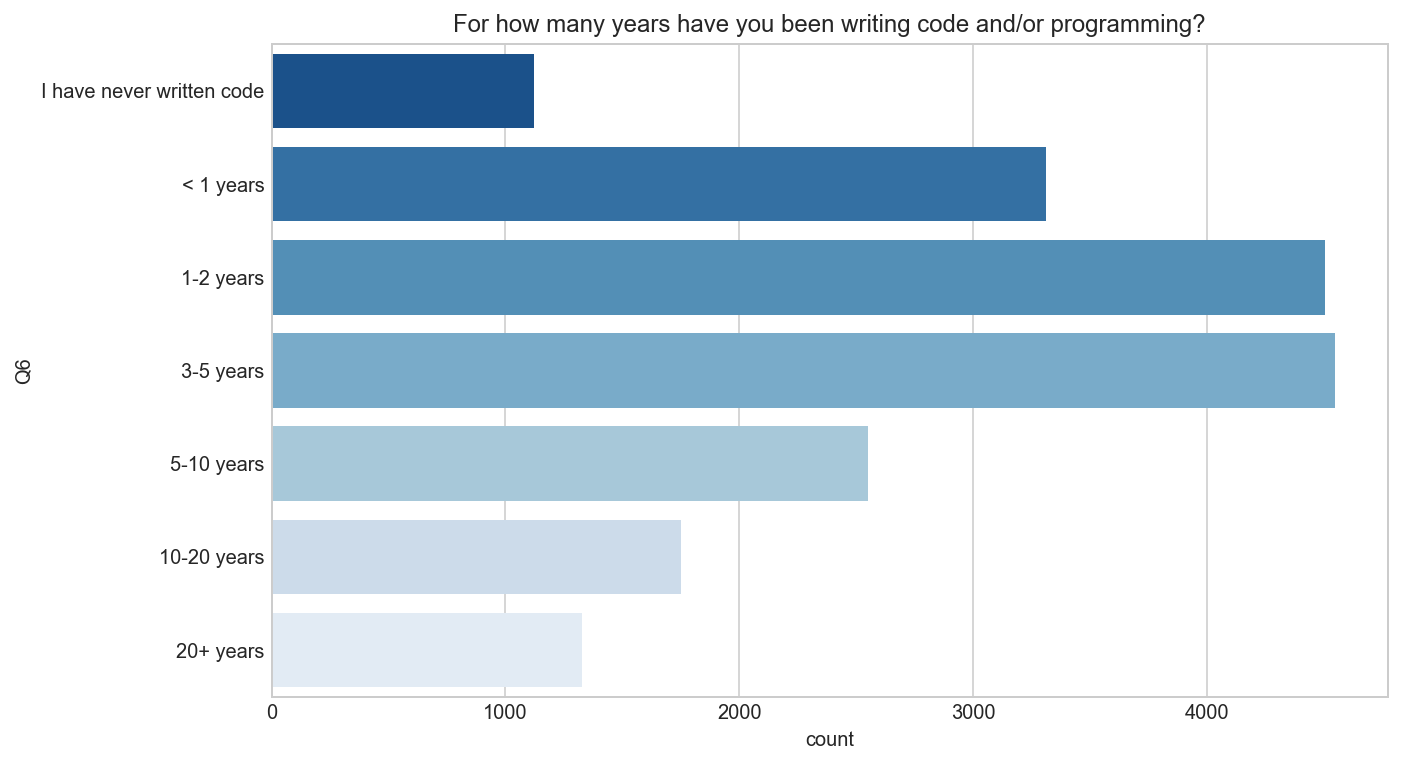

In [25]:
show_countplot_by_qno("Q6", order=q6_cols)